In [46]:
import pandas as pd
dados_reviews = pd.read_csv('apps_reviews_validacao.csv', sep=',')
dados_reviews.head(2)

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN


In [47]:
dados_reviews.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,b2ca0eda-2492-411f-b5be-e81071f52122,Shopee,O reconhecimento facial simplesmente não funci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [48]:
dados_reviews.loc[0,'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

# pre-processamento
removendo caracteres nao latinos


In [49]:
import regex # trabalhar com expressões regulares
#dados_reviews['texto'] = dados_reviews['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))
dados_reviews['texto'] = dados_reviews['content'].apply(lambda x: regex.sub(r'[^\p{Latin}]', u' ', str(x)))


In [50]:
dados_reviews.loc[0,'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

colocando textos minusculo

In [51]:
dados_reviews['content'] = dados_reviews['content'].apply(lambda x: str(x).lower())

In [52]:
dados_reviews.loc[0,'content']

'o app da shopee é razoável. apesar de ser fácil de utilizar, apresenta alguns bugs. por exemplo: sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. sugestões de produtos que não têm nada a ver com coisas de nosso interesse. dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. falhas para carregar certos anexos para avaliação dos produtos. no geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

removendo stopwords

In [53]:
import nltk #caso não funcione, adicione a linha nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arthurwsl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/arthurwsl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
dados_reviews['content'] = dados_reviews['content'].apply(remove_stopwords)

In [55]:
dados_reviews.loc[0,'content']

'app shopee razoável . apesar fácil utilizar , apresenta alguns bugs . exemplo : sugestão palavra errada campo pesquisa acarreta busca errada . sugestões produtos têm nada ver coisas interesse . dificuldade acesso alguns jogos travamento durante alguma jogada . falhas carregar certos anexos avaliação produtos . geral , problemas pode contornar , pois ocorrem tanta frequência .'

In [93]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('portuguese')

# Função para aplicar a stemização em uma string
def stem_text(text):
    words = nltk.word_tokenize(text)  # Tokeniza a string em palavras
    stemmed_words = [stemmer.stem(word) for word in words]  # Aplica o stemizador
    return ' '.join(stemmed_words)  # Junta as palavras de volta em uma string

# Aplicar a função de stemização na coluna 'textos' do DataFrame
dados_reviews['content'] = dados_reviews['content'].apply(stem_text)

dados_reviews.loc[0,'content']

'app shope razoável . apes fácil utiliz , apresent alguns bugs . exempl : sugestã palavr errad camp pesquis acarret busc errad . sugestõ produt têm nad ver cois inter . dificuldad acess alguns jog travament durant algum jog . falh carreg cert anex avali produt . geral , problem pod contorn , pois ocorr tant frequênc .'

# representando texto em formato vetorial

instanciando metodos que fara a representacao do texto usando o modelo bag of word

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [95]:
BoW_matriz = vectorizer.fit_transform(dados_reviews['content'])
palavras = vectorizer.get_feature_names_out()


In [96]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=palavras)
BOW_dataframe

,00,000,00000,001,01,02,03,04,05,06,...,últim,únic,úte,útil,ℕ𝕒,𝕒𝕔𝕙𝕖𝕚,𝕕𝕚𝕗𝕚𝕔𝕚𝕝,𝕘𝕠𝕤𝕥𝕖𝕚,𝕞𝕦𝕚𝕥𝕠,𝕦𝕤𝕒𝕣
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento. 

In [97]:
textos_bow = BOW_dataframe
categorias = dados_reviews['sentiment'] # as categorias devem estar separadas dos dados de treinamento 
categorias_polaridade = dados_reviews['sentiment_polarity']

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.2) #20% para teste.
X_trainp, X_testp, y_trainp, y_testp = train_test_split(textos_bow, categorias_polaridade, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

In [99]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayesp = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayesp.fit(X_trainp, y_trainp)
predicoes = naive_bayes.predict(X_test)# recebe os 20% dos dados de teste sem as categorias - "escondidas"
predicoesp = naive_bayesp.predict(X_testp)

Como sabemos de antemão a categoria correta do conjunto de teste, vamos avaliar a performance do nosso classificador de notícias Bayesiano

In [101]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(y_test, predicoes))
#print("Classes em y_test:", np.unique(y_test))
#print("Classes em predicoes:", np.unique(predicoes))
# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

       anger       0.58      0.53      0.56       148
     disgust       0.53      0.60      0.56       193
        fear       0.00      0.00      0.00         6
   happiness       0.79      0.55      0.65        67
     neutral       1.00      0.06      0.11        18
     sadness       0.59      0.69      0.64       170
    surprise       0.00      0.00      0.00         1

    accuracy                           0.58       603
   macro avg       0.50      0.35      0.36       603
weighted avg       0.60      0.58      0.57       603



/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_testp, predicoesp))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

    negative       0.81      0.85      0.83       337
     neutral       0.00      0.00      0.00        18
    positive       0.76      0.76      0.76       248

    accuracy                           0.79       603
   macro avg       0.52      0.54      0.53       603
weighted avg       0.76      0.79      0.77       603



Vamos montar a matriz de confusão usando um mapa de valor da biblioteca Seaborn

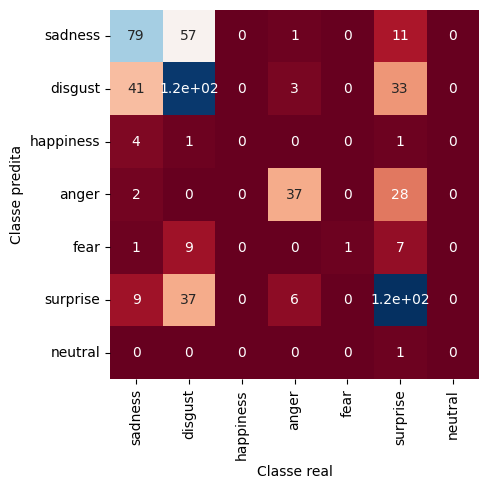

In [103]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=categorias.unique(),
            yticklabels=categorias.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()


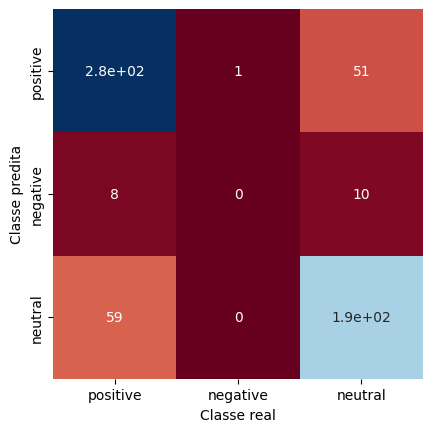

In [104]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_testp, predicoesp)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=categorias_polaridade.unique(),
            yticklabels=categorias_polaridade.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()


# Teste para uma notícia nova

Vamos supor que o classificador acima seja o melhor de todos, isto é, você fez vários testes de pré-processamento e testou diferentes formas de representação de texto (features). Tendo isso em vista, agora vem a parte legal que é testar esse classificador em notícias diferentes de qualquer uma existente na base de treinamento. Porém, antes disso, precisamos treinar o classificador em toda a base de notícias que montamos anteriormente. Isso porque nos testes de performance, separamos os dados em treino e teste com a intenção de simular o comportamento do algoritmo. Por isso, vamos treinar o classificador bayesiano em toda a base agora: 

In [66]:
naive_bayes = MultinomialNB()
naive_bayes.fit(textos_bow, categorias)

MultinomialNB()